In [2]:
%pip install pyimkernel

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import warnings
import numpy as np
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from pyimkernel import ApplyKernels

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

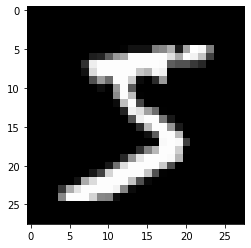

In [6]:
plt.imshow(X_train[0], cmap=plt.cm.gray)

In [7]:
def pixel_normalization(image):
    return (image / 255)

In [8]:
X_train = pixel_normalization(X_train)
X_test = pixel_normalization(X_test)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
cnn.add(Dropout(.2))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', strides=(1,1), activation='relu'))
cnn.add(Dropout(.2))
cnn.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(.5))
cnn.add(Dense(units=10, activation='softmax'))

plot_model(cnn, show_shapes=True, show_layer_activations=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss=CategoricalCrossentropy(from_logits=True),
            metrics=CategoricalAccuracy())

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
checkpoint = ModelCheckpoint(filepath='/kaggle/working/model_weights.h5', monitor='val_categorical_accuracy', save_best_only=True)
history = cnn.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=(X_test, y_test), callbacks=[checkpoint, reduce_lr])

Epoch 1/10
300/300 [==============================] - 54s 165ms/step - loss: 0.3239 - categorical_accuracy: 0.9004 - val_loss: 0.0846 - val_categorical_accuracy: 0.9785 - lr: 0.0010
Epoch 2/10
300/300 [==============================] - 52s 173ms/step - loss: 0.1038 - categorical_accuracy: 0.9697 - val_loss: 0.0541 - val_categorical_accuracy: 0.9852 - lr: 0.0010
Epoch 3/10
300/300 [==============================] - 48s 161ms/step - loss: 0.0792 - categorical_accuracy: 0.9764 - val_loss: 0.0400 - val_categorical_accuracy: 0.9893 - lr: 0.0010
Epoch 4/10
300/300 [==============================] - 49s 164ms/step - loss: 0.0632 - categorical_accuracy: 0.9810 - val_loss: 0.0351 - val_categorical_accuracy: 0.9891 - lr: 0.0010
Epoch 5/10
300/300 [==============================] - 49s 162ms/step - loss: 0.0547 - categorical_accuracy: 0.9834 - val_loss: 0.0355 - val_categorical_accuracy: 0.9894 - lr: 0.0010
Epoch 6/10
300/300 [==============================] - 48s 162ms/step - loss: 0.0482 - cate

In [32]:
y_pred = cnn.predict(np.expand_dims(X_test[0], axis=0))
y_pred

1/1 [==============================] - 0s 61ms/step


array([[5.24125188e-10, 1.93504675e-07, 1.93159522e-07, 1.45954641e-06,
        4.99057933e-08, 4.84608076e-10, 2.19426799e-13, 9.99996901e-01,
        1.48335815e-08, 1.19725712e-06]], dtype=float32)

In [33]:
predictions = np.argmax(y_pred, axis=1)
predictions

array([7], dtype=int64)

313/313 [==============================] - 2s 5ms/step


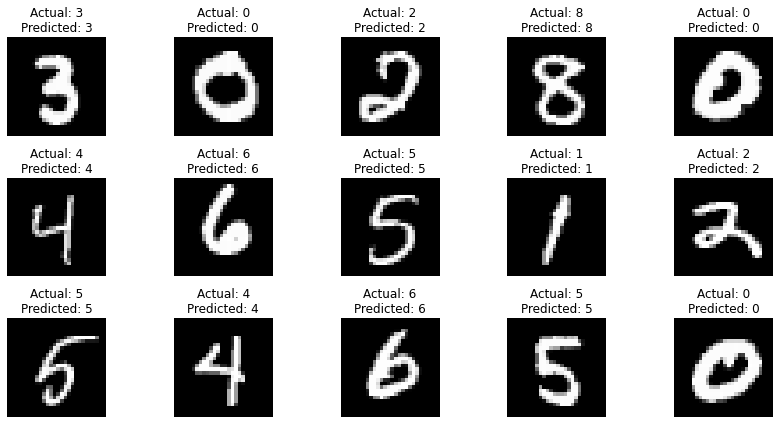

In [29]:
predictions = cnn.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Select some random test samples (e.g., the first 15)
num_samples_to_display = 15
sample_indices = np.random.choice(len(X_test), num_samples_to_display, replace=False)

# Create a figure to display the comparison
plt.figure(figsize=(12, 6))

for i, sample_index in enumerate(sample_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {np.argmax(y_test[sample_index])}\nPredicted: {predicted_labels[sample_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [31]:
cnn.save("model.h5")
print("Model Saved!!!")

Model Saved!!!
